In [1]:
import matplotlib.pyplot as plt
import scipy.stats as t
import pandas as pd

# In order to handle hypothesis testing we should start by formulating null and alternative hypothesis
- H0(Null Hypothesis) - There is no association
- HA(Alternative) - There is an association

# In order to compare two means and to understand do they come from the same distribution we can use `t-criteria` by handling t-test. By having `t-criteria` and degrees of freedom (df = n-1) we can achieve `p-value`, which will say us the probability of achiving this or more expressed differences in two means, believing that H0 - is true.

### For example we can compare the expression of 2 genes, gene A and gene B and test do their means come from the same distribution or not.

In [2]:
df = pd.read_csv("../data/genetherapy.csv")
df.head()

,expr,Therapy
0,100,A
1,96,A
2,101,A
3,95,A
4,103,A


In [3]:
a = df[df['Therapy'] == "A"]['expr']
b = df[df['Therapy'] == "B"]['expr']

### Using `scipy.stats.ttest_ind` we calculate t-criteria and `p-value`

In [4]:
tstat, pval = t.ttest_ind(a, b)
pval

0.6204107442268376

### `p-value` is greater than 0.05 and we accept that null hypothesis is true, which means that there is no difference in gene therapy A and B

# Using `Anova` or Analysis of Variance we can compare not only two groups but handle test which compares more than 3 groups.

### `scipy.stats.f_oneway` comes in handy for such tasks

In [5]:
df['Therapy'].value_counts()

A    15
B    15
C    15
D    15
Name: Therapy, dtype: int64

### Let's calculate, do the means of 4 grops differ from each other

In [6]:
c = df[df['Therapy'] == "C"]['expr']
d = df[df['Therapy'] == 'D']['expr']
fstat, pval = t.f_oneway(a, b, c, d)

In [7]:
pval

0.00015249722895229536

### `pval` is smaller than 0.05 and we can say that there is a difference in mean in population

# Hypothesis testing in order to test, if our distribution is normal or not

### The Shapiro-Wilk test tests the null hypothesis that the data was drawn from a normal distribution.

In [8]:
shapiro_test = t.shapiro(df['expr'])

In [9]:
shapiro_test

ShapiroResult(statistic=0.977378249168396, pvalue=0.32793858647346497)

### Our `p-value` is greater than 0.05 and test says that our distribution is normal.

# Chi-Square Test
- is used for compare two categorical variables
- uses pearson's distance - is a hypothesis check for difference catregorical variable from their expected distribution
- chi-square = `(distribution that we have - expected distribution)^2 and divided by expected distribution`


# Chi-Square distribution
- Strong assymetry with mean close to 0
- `df = (n-1)` or for contingency tables `df = (n-1)*(m-1)`, where `m` is number of columns

In [10]:
df = pd.read_csv('../data/chi2test.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8.0,0.0


### Chi2 test for researching relation between sex and achieving job

In [11]:
xtab = pd.crosstab(df['gender'], df['target'])

In [12]:
xtab

target,0.0,1.0
gender,,
Female,910,326
Male,10192,3006
Other,140,50


In [13]:
pval, chi2, _, expected = t.chi2_contingency(xtab)
print('''
H0 - there is a dependence between gender and the desire to find a job in the contingency table.
HA - there is no dependence between gender and the desire to find a job in the contingency table.
''')
result = 'Reject H0' if pval < 0.05 else "Accept H0"
print(pval)
print(result)


H0 - there is a dependence between gender and the desire to find a job in the contingency table.
HA - there is no dependence between gender and the desire to find a job in the contingency table.

9.336654119709161
Accept H0


### HA - there is no dependence between gender and the desire to find a job in the contingency table.

### Analysis of difference in cells between expected and real values

In [14]:
expected = pd.DataFrame(expected)
expected['Gender'] = ["Female", "Male", "Other"]
expected

,0,1,Gender
0,950.158096,285.841904,Female
1,10145.782002,3052.217998,Male
2,146.059902,43.940098,Other


In [15]:
import numpy as np
real = pd.DataFrame(np.array(xtab))
real['Gender'] = ["Female", "Male", "Other"]
real

,0,1,Gender
0,910,326,Female
1,10192,3006,Male
2,140,50,Other


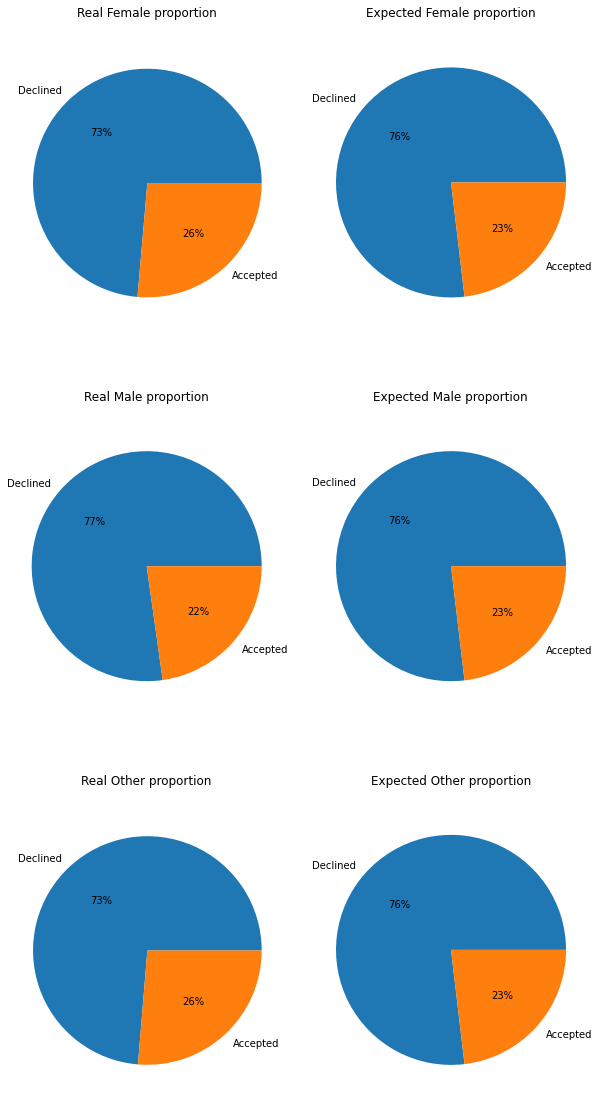

In [43]:
plt.figure(figsize=(10, 20))
i = 1
for j in range(3):
    plt.subplot(3, 2, i)
    plt.title(f'Real {real.iloc[j]["Gender"]} proportion')
    plt.pie(np.array(real.iloc[j][[0, 1]]), autopct='%d%%', labels=["Declined", "Accepted"])
    plt.axis('equal')
    i += 1
    plt.subplot(3, 2, i)
    plt.title(f'Expected {expected.iloc[j]["Gender"]} proportion')
    plt.pie(np.array(expected.iloc[j][[0, 1]]), autopct='%d%%', labels=["Declined", "Accepted"])
    plt.axis('equal')
    i += 1